In [2]:
from pymongo import MongoClient
from bson.objectid import ObjectId
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
client = MongoClient('192.168.178.25', 27017)
db = client.TFE
collection = db.results

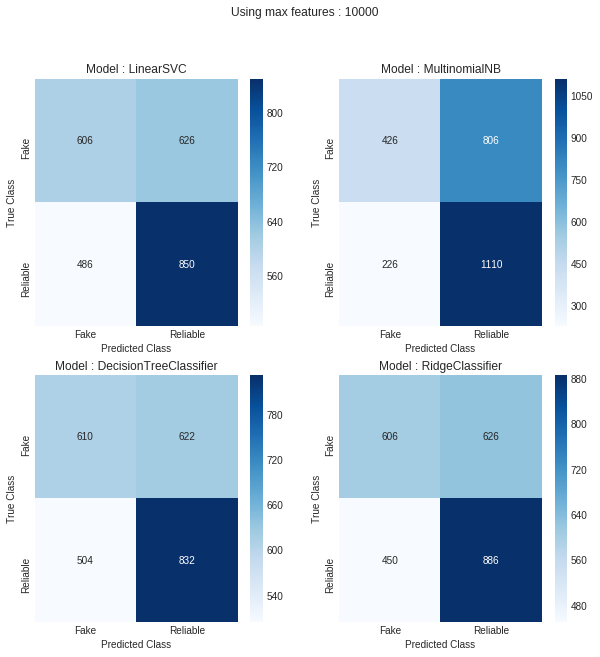

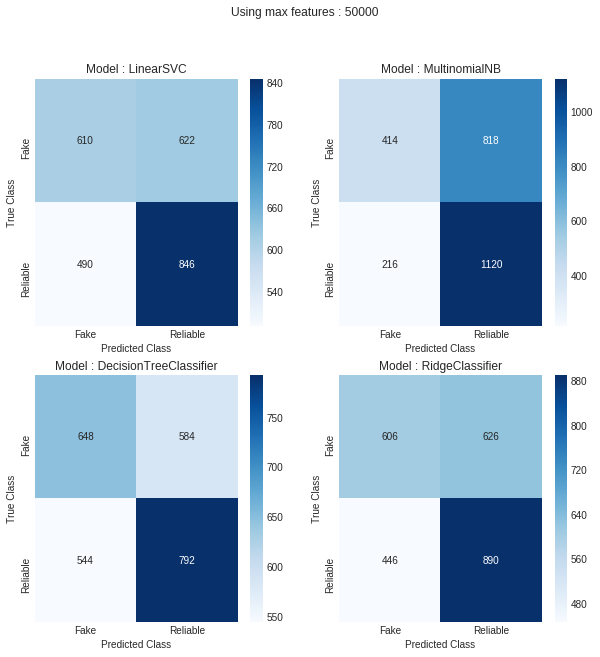

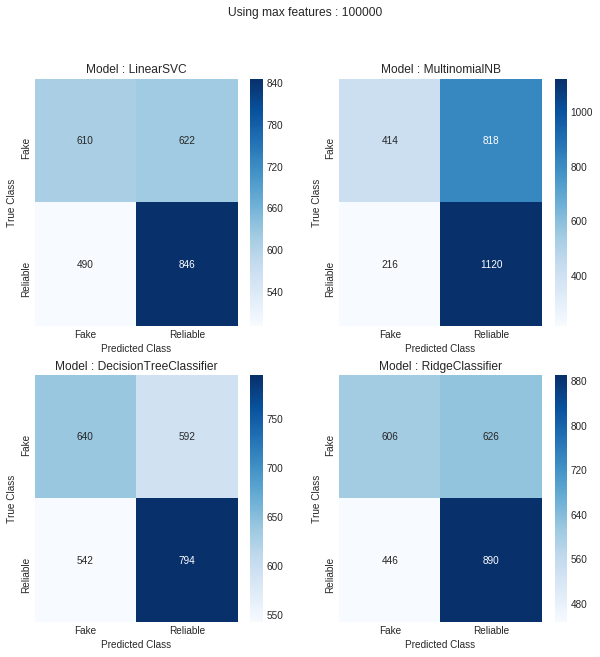

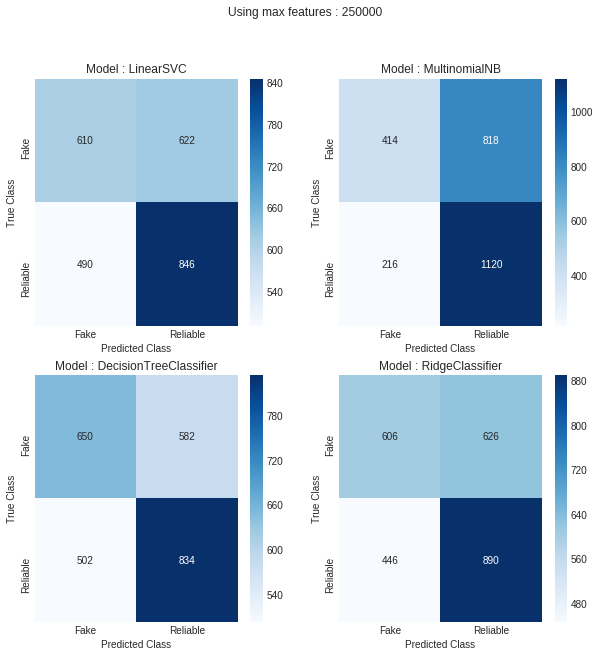

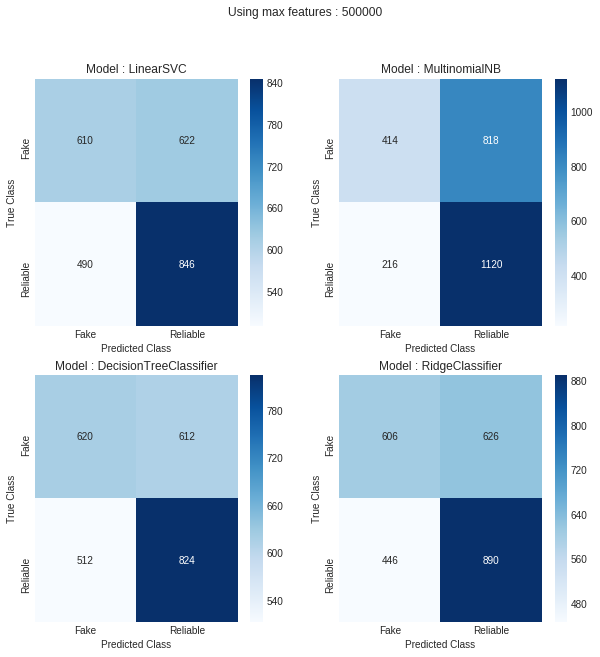

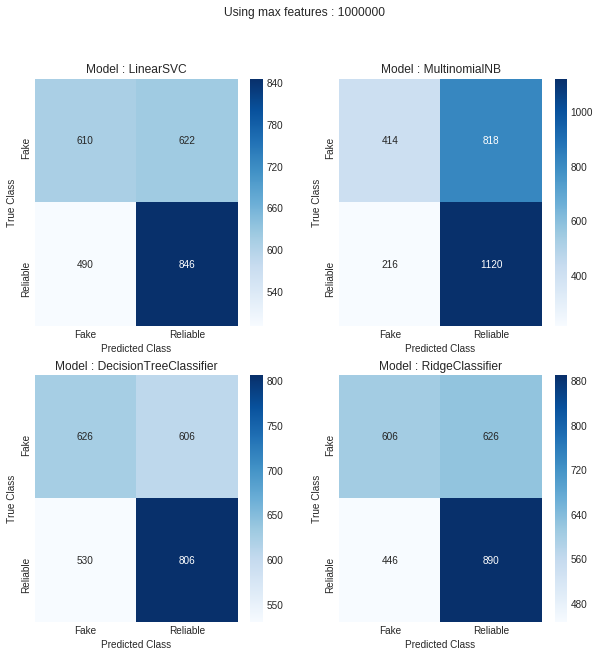

In [8]:
for res in collection.find({'experiment_id' : 12}):
    features = res['max_features']
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
    fig.suptitle("Using max features : {}".format(features))
    for i, model in enumerate(res['report']):
        cm = np.array(model['confusion matrix']['test']).reshape(2, 2)
        df = pd.DataFrame(cm, index = ['Fake', 'Reliable'], columns = ['Fake', 'Reliable'])
        sns.heatmap(df, annot=True, cmap="Blues", ax = axes.flat[i], fmt='g')
        axes.flat[i].set_title('Model : {}'.format(model['model']))
        axes.flat[i].set_xlabel('Predicted Class')
        axes.flat[i].set_ylabel('True Class')